In [2]:
#importing required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [3]:
#importing the data
data_train = pd.read_csv("/content/train.csv")

In [4]:
#viewing the data
data_train.head(20)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


In [5]:
#shape of the data
data_train.shape

(14999, 9)

In [6]:
#data type of the each attributes in the data_train dataset
data_train.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [7]:
#Assigining each category a number for category feature
category = {'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
data_train["category"] = data_train["category"].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [8]:
#Removing character F present in the data
data_train = data_train[data_train.views != "F"]
data_train = data_train[data_train.likes != "F"]
data_train = data_train[data_train.dislikes != "F"]
data_train = data_train[data_train.comment != "F"]

In [9]:
#converting values to numeric for adview, views, likes, dislikes, comment
data_train["adview"] = pd.to_numeric(data_train["adview"])
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["comment"] = pd.to_numeric(data_train["comment"])

In [10]:
column_vidid = data_train["vidid"]

In [12]:
#Encoding Features like category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
data_train['category'] = LabelEncoder().fit_transform(data_train['category'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])

In [13]:
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,PT7M37S,5
1,2741,2,1707,56,2,6,2185,PT9M30S,3
2,8138,1,2023,25,0,2,2094,PT2M16S,2
3,9005,6,620860,777,161,153,2119,PT4M22S,7
4,122,1,666,1,0,0,2091,PT31S,3


In [14]:
#convert time in seconds from duration
import datetime
import time
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  p = ['H','M', 'S']
  for i in y:
    if i not in p:
      mm+=i
    else:
      if(i=="H"):
        h =mm
        mm = ''
      else:
        if (i=="M"):
          m = mm
          mm = ''
        else:
          s = mm
          mm=''
  if(h==''):
    h = '00'
  if(m==''):
    m = '00'
  if(s==''):
    s = '00'
  bp = h+':'+m+':'+s
  return bp
train=pd.read_csv("/content/train.csv")
mp = pd.read_csv("/content/train.csv")["duration"]
time = mp.apply(checki)

In [17]:
def func_sec(time_string):
  h , m, s = time_string.split(':')
  return int(h)*3600 + int(m)*60 + int(s)
time1 = time.apply(func_sec)

In [18]:
data_train["duration"] = time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,5
1,2741,2,1707,56,2,6,2185,570,3
2,8138,1,2023,25,0,2,2094,136,2
3,9005,6,620860,777,161,153,2119,262,7
4,122,1,666,1,0,0,2091,31,3


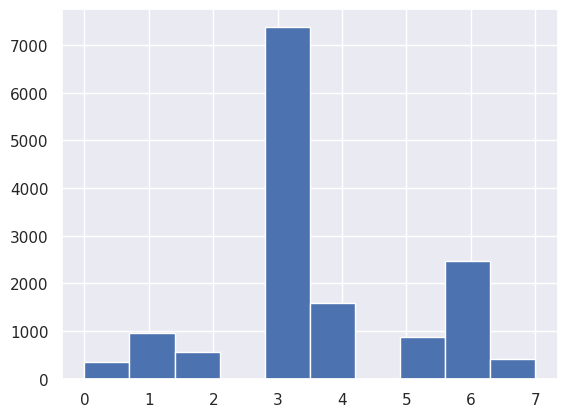

In [19]:
#Visualization
plt.hist(data_train["category"])
plt.show()

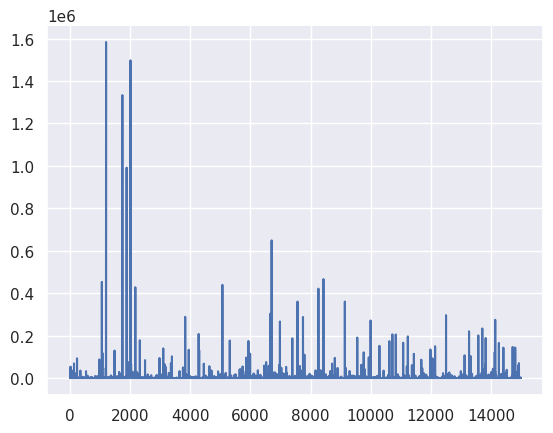

In [23]:
plt.plot(data_train["adview"])
plt.show()

In [21]:
#Removing videos with adview greater than 2000000 as outlier
data_train = data_train[data_train["adview"]<2000000]

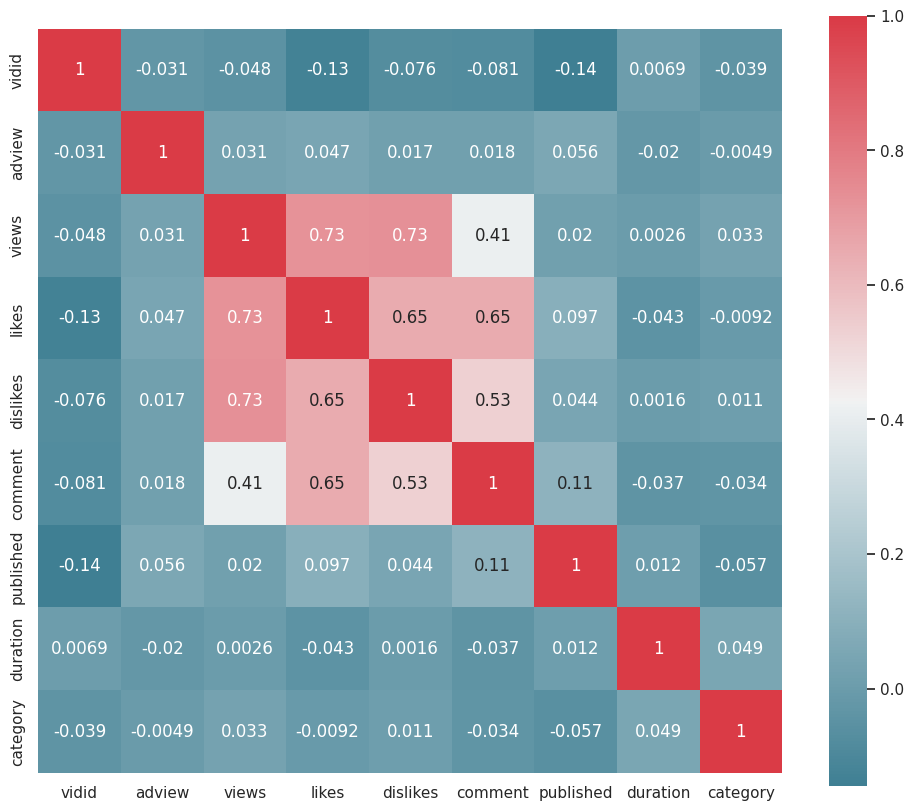

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(data_train.corr(), mask=np.zeros_like(data_train.corr(), dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

In [43]:
#splitting the data
from sklearn.model_selection import train_test_split
#data_train = data_train.drop(["adview"], axis=1)
#data_train = data_train.drop(["vidid"], axis=1)
data_train.head()
Y_train = pd.DataFrame(data= data_train.iloc[:,1].values, columns=['target'])
X_train, X_test, Y_train, Y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)


In [44]:
X_train.shape

(11708, 7)

In [46]:
X_train

array([[6.27970800e-04, 4.12227296e-04, 1.82005703e-04, ...,
        5.10700797e-01, 4.25360966e-03, 4.28571429e-01],
       [1.02842406e-02, 3.12517617e-03, 7.32067383e-03, ...,
        6.49181704e-01, 1.37320699e-01, 8.57142857e-01],
       [1.88608556e-04, 6.69428942e-05, 0.00000000e+00, ...,
        4.05371381e-01, 4.20634733e-03, 7.14285714e-01],
       ...,
       [1.48331209e-03, 3.03004679e-04, 7.07799956e-04, ...,
        5.19093580e-01, 5.15159392e-03, 4.28571429e-01],
       [9.86119882e-03, 4.87626135e-03, 1.53087019e-02, ...,
        9.00125892e-01, 5.67147955e-03, 8.57142857e-01],
       [2.87646701e-04, 4.29843847e-04, 1.21337135e-04, ...,
        9.39991607e-02, 8.36543233e-03, 4.28571429e-01]])

In [49]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6
count,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000,11708.000000
mean,0.005052,0.009764,0.005077,0.005572,0.651200,0.024768,0.515935
std,0.018710,0.030775,0.019533,0.020744,0.243208,0.056241,0.225606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000227,0.000303,0.000142,0.000093,0.480067,0.004443,0.428571
50%,0.001165,0.001624,0.000789,0.000613,0.715065,0.007727,0.428571
75%,0.004232,0.006684,0.003438,0.003091,0.866555,0.017156,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
X_train.mean()

0.1739096800320488

In [51]:
from sklearn import metrics
def print_error(X_test, Y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(Y_test, prediction))
  print("Root Mean squared Error:", np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

In [52]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
print_error(X_test,Y_test, linear_regression)

Mean Absolute Error:  7.865273336829544e-12
Mean Squared Error: 1.3312785056423465e-22
Root Mean squared Error: 1.15381042881504e-11


In [53]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,Y_train)
print_error(X_test,Y_test, linear_regression)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error:  7.865273336829544e-12
Mean Squared Error: 1.3312785056423465e-22
Root Mean squared Error: 1.15381042881504e-11


In [54]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
print_error(X_test,Y_test, decision_tree)

Mean Absolute Error:  33.4176912568306
Mean Squared Error: 474471.6581284153
Root Mean squared Error: 688.8190314795428


In [57]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,Y_train)
print_error(X_test,Y_test, random_forest)

<ipython-input-57-02753a32c100>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,Y_train)


Mean Absolute Error:  38.63648441885174
Mean Squared Error: 459198.7306184107
Root Mean squared Error: 677.6420372279237


In [58]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([
Dense(6, activation="relu",
input_shape=X_train.shape[1:]),
Dense(6,activation="relu"),
Dense(1)
])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

In [59]:
history=ann.fit(X_train,y_train,epochs=100)
ann.summary()
print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 3s 4ms/step - loss: 83962456.0000 - mean_squared_error: 83962456.0000
Epoch 2/100
366/366 [==============================] - 2s 7ms/step - loss: 83927176.0000 - mean_squared_error: 83927176.0000
Epoch 3/100
366/366 [==============================] - 4s 11ms/step - loss: 83790528.0000 - mean_squared_error: 83790528.0000
Epoch 4/100
366/366 [==============================] - 2s 4ms/step - loss: 83512152.0000 - mean_squared_error: 83512152.0000
Epoch 5/100
366/366 [==============================] - 1s 4ms/step - loss: 83073056.0000 - mean_squared_error: 83073056.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 82486056.0000 - mean_squared_error: 82486056.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 81793352.0000 - mean_squared_error: 81793352.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 81014576.0000 - mean_squared_error: 81014576.0000

In [60]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadviewprediction.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadviewprediction.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
!ls

ann_youtubeadviewprediction.h5	decisiontree_youtubeadviewprediction.pkl  sample_data  train.csv
